<a href="https://colab.research.google.com/github/vaishnavi004-V/ML-Project/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importin the Libraries


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and Processing

In [10]:
#loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [11]:
#print 1st 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [12]:
#print last 5 rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
#number of rows and clos
gold_data.shape

(2290, 6)

In [15]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
#checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [17]:
#getting the statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1.Positive Correlation
2.Negative Correlation

In [21]:
#correlation = gold_data.corr()
correlation = gold_data.apply(pd.to_numeric, errors='coerce').corr()



<Axes: >

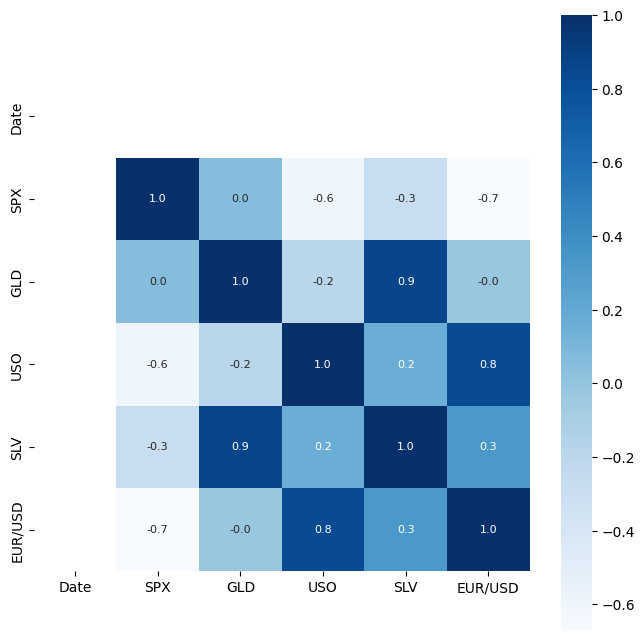

In [27]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [28]:
#correlation values og GLD
print(correlation['GLD'])

Date            NaN
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-29-3d89779c2bfa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

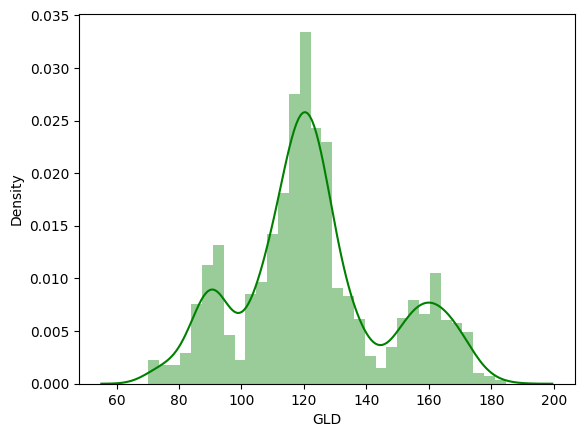

In [29]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [30]:
x= gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']


In [31]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [32]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 2)

Model Training:
Random Forest Regressor

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
#training the model
regressor.fit(x_train,y_train) #x is all feature y is gld price

RandomForestRegressor()

Model Evaluation

In [39]:
#predection on test data
test_data_prediction = regressor.predict(x_test)

In [40]:
print(test_data_prediction)

[168.30939918  82.28759972 116.21500014 127.68760066 120.7540014
 154.85149732 149.90309842 125.88750074 117.5141989  126.08220101
 116.47120174 172.08280119 141.61359886 167.94239851 115.21950047
 117.49950031 138.03330338 170.06440101 159.24230349 158.48960025
 155.19170054 125.3008003  175.59379939 157.10440403 125.18550047
  93.73219956  77.15840013 120.2116003  119.05459905 167.34459932
  88.26060057 125.36600056  91.17450068 117.76829989 121.1058993
 136.34970086 115.62790131 115.21230093 149.97600037 107.19730106
 104.41720257  87.16569781 126.5403007  118.0927995  153.12159883
 119.64230022 108.41079965 108.02769836  93.24280051 127.20739749
  74.65820067 113.61109962 121.43800005 111.15599898 118.90699885
 120.88269939 159.18450007 167.97140105 147.10399687  85.78109819
  94.36470023  86.75459869  90.36490009 119.0139009  126.4762004
 127.5687     170.11259946 122.22819929 117.33949884  98.48220066
 168.70670212 143.10679876 132.00650219 121.15100218 121.39409935
 119.78930035

In [41]:
# R squared error
error_score =metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ", error_score) #model perform very well

R squared error :  0.9887973761297815


Compare the Actual Values and Predicted Values in a Plot

In [42]:
y_test =list(y_test)

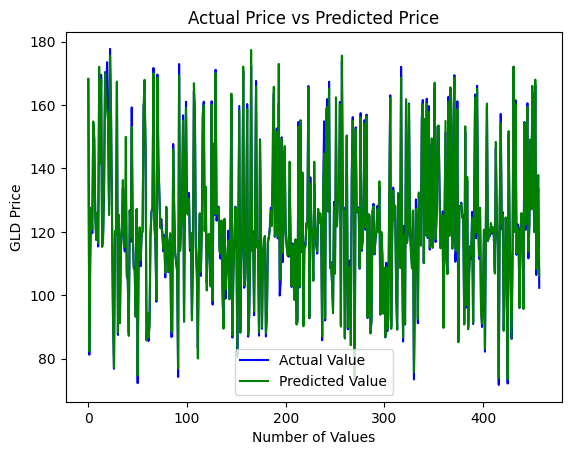

In [46]:
plt.plot(y_test,color ='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()